# Problem Statement

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Output: Number of predicted wins (W)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ball = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")
ball

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
ball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
ball.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [5]:
ball.shape

(30, 17)

In [6]:
ball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

<AxesSubplot:>

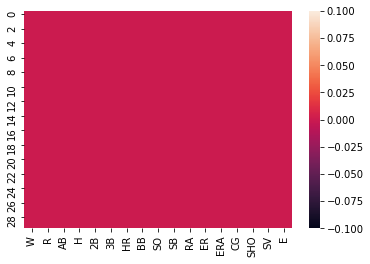

In [7]:
sns.heatmap(ball.isnull())

As I can visualize, all the data is cleaned. 

Summary Statistics

In [8]:
ball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


data has few outliers in the column of R, E, ERA and SHO.

In [9]:
ball.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

# EDA

<AxesSubplot:>

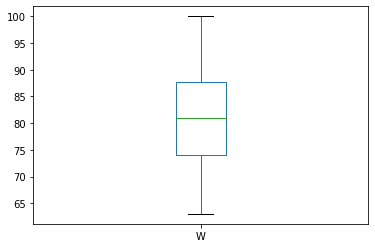

In [10]:
ball['W'].plot.box()

<AxesSubplot:>

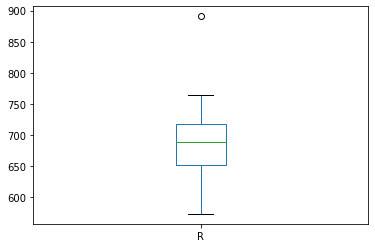

In [11]:
ball['R'].plot.box()

<AxesSubplot:>

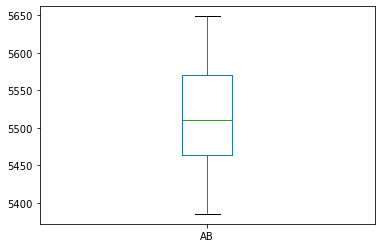

In [12]:
ball['AB'].plot.box()

<AxesSubplot:>

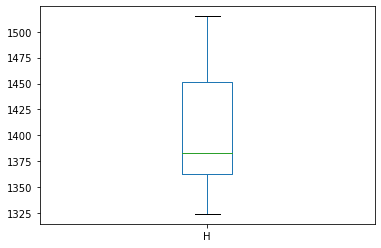

In [13]:
ball['H'].plot.box()

<AxesSubplot:>

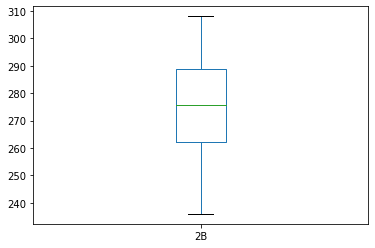

In [14]:
ball['2B'].plot.box()

<AxesSubplot:>

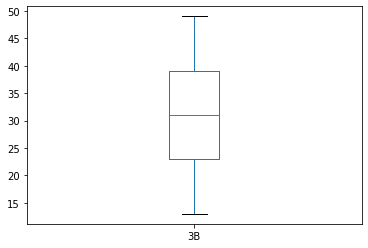

In [15]:
ball['3B'].plot.box()

<AxesSubplot:>

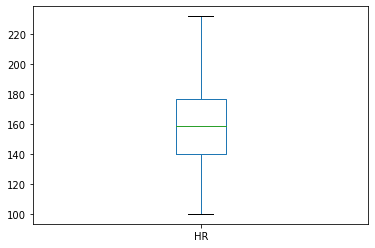

In [16]:
ball['HR'].plot.box()

<AxesSubplot:>

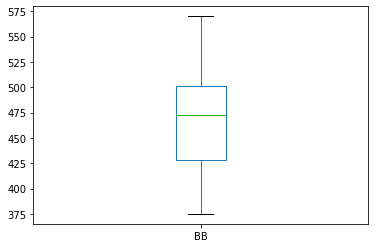

In [17]:
ball['BB'].plot.box()

<AxesSubplot:>

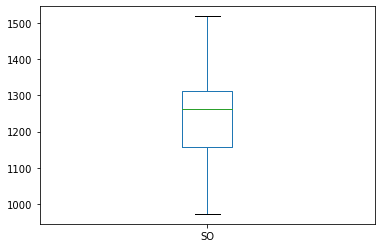

In [18]:
ball['SO'].plot.box()

<AxesSubplot:>

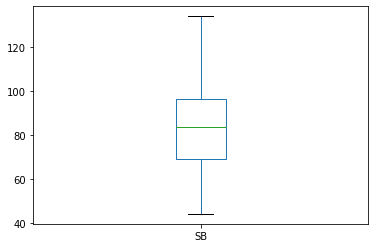

In [19]:
ball['SB'].plot.box()

<AxesSubplot:>

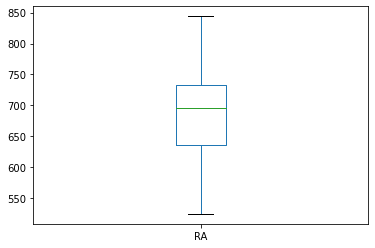

In [20]:
ball['RA'].plot.box()

<AxesSubplot:>

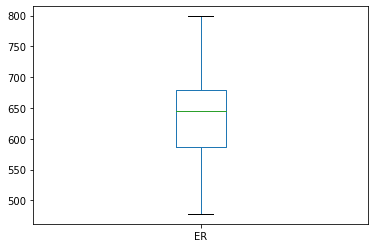

In [21]:
ball['ER'].plot.box()

<AxesSubplot:>

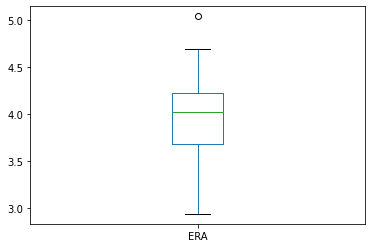

In [22]:
ball['ERA'].plot.box()

<AxesSubplot:>

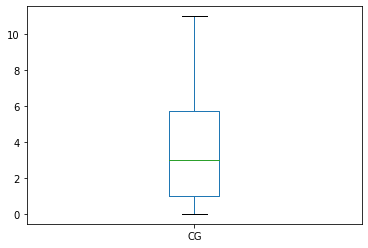

In [23]:
ball['CG'].plot.box()

<AxesSubplot:>

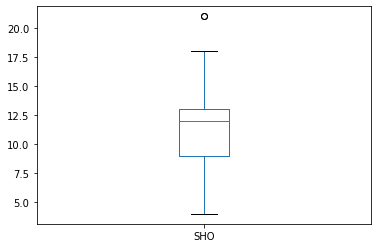

In [24]:
ball['SHO'].plot.box()

<AxesSubplot:>

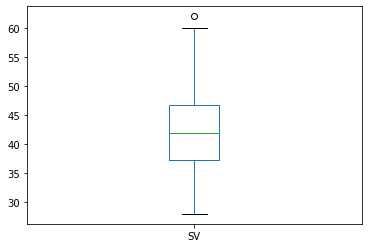

In [25]:
ball['SV'].plot.box()

<AxesSubplot:>

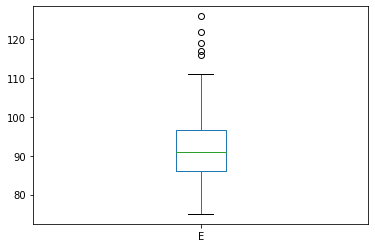

In [26]:
ball['E'].plot.box()

# Correlation

In [27]:
ball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

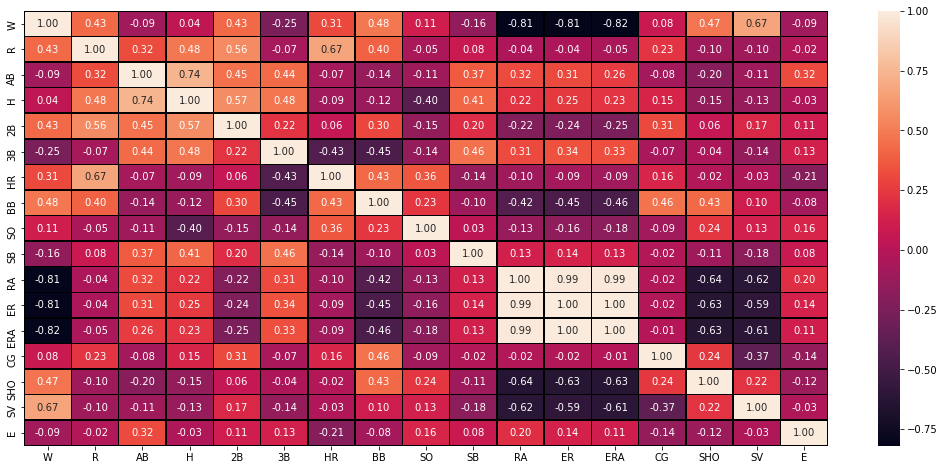

In [29]:
# Correlation using heatmap

plt.figure(figsize = (18,8))
sns.heatmap(ball.corr(), annot = True, linewidth = .5, linecolor = 'black', fmt = '.2f')

# Normal distribution Curve

<AxesSubplot:xlabel='W', ylabel='Density'>

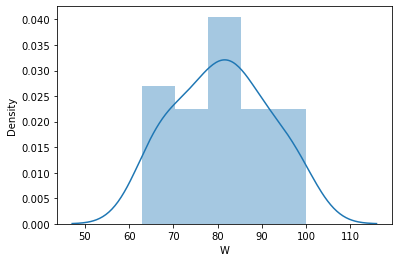

In [30]:
# for visualize skewness
sns.distplot(ball['W'])

<AxesSubplot:xlabel='R', ylabel='Density'>

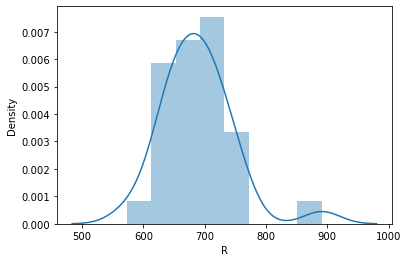

In [31]:
sns.distplot(ball['R'])

<AxesSubplot:xlabel='AB', ylabel='Density'>

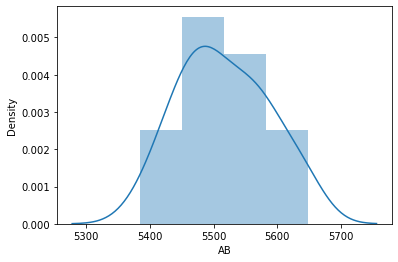

In [33]:
sns.distplot(ball['AB'])

<AxesSubplot:xlabel='H', ylabel='Density'>

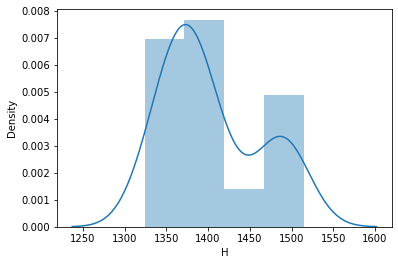

In [34]:
sns.distplot(ball['H'])

<AxesSubplot:xlabel='2B', ylabel='Density'>

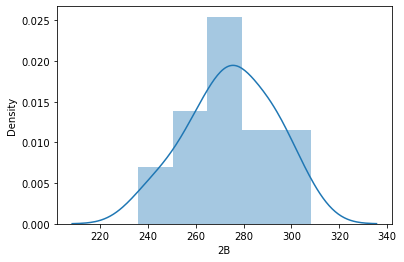

In [35]:
sns.distplot(ball['2B'])

<AxesSubplot:xlabel='3B', ylabel='Density'>

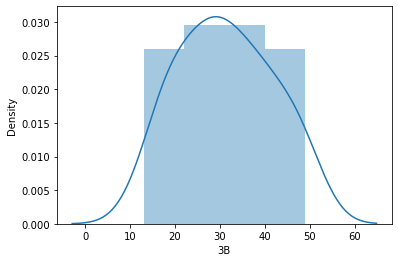

In [36]:
sns.distplot(ball['3B'])

<AxesSubplot:xlabel='HR', ylabel='Density'>

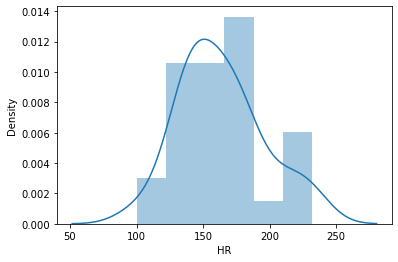

In [37]:
sns.distplot(ball['HR'])

<AxesSubplot:xlabel='BB', ylabel='Density'>

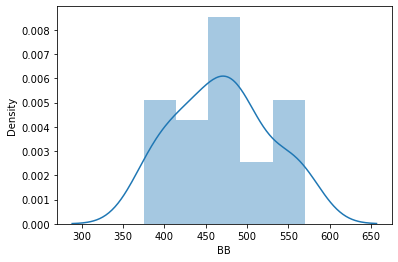

In [38]:
sns.distplot(ball['BB'])

<AxesSubplot:xlabel='SO', ylabel='Density'>

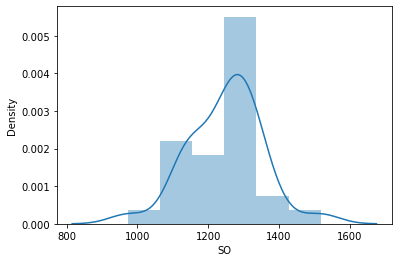

In [39]:
sns.distplot(ball['SO'])

<AxesSubplot:xlabel='SB', ylabel='Density'>

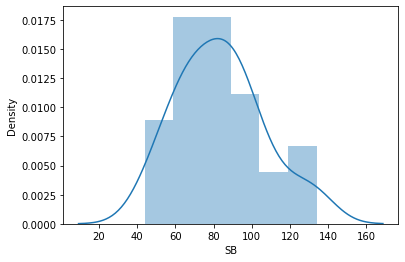

In [40]:
sns.distplot(ball['SB'])

<AxesSubplot:xlabel='RA', ylabel='Density'>

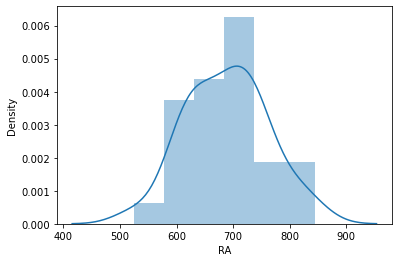

In [41]:
sns.distplot(ball['RA'])

<AxesSubplot:xlabel='ER', ylabel='Density'>

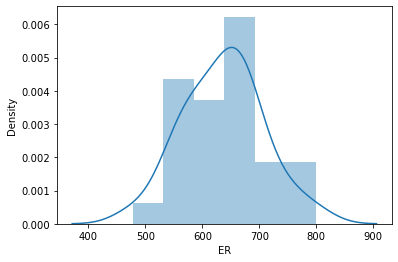

In [42]:
sns.distplot(ball['ER'])

<AxesSubplot:xlabel='ERA', ylabel='Density'>

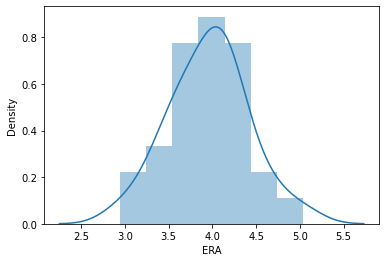

In [43]:
sns.distplot(ball['ERA'])

<AxesSubplot:xlabel='CG', ylabel='Density'>

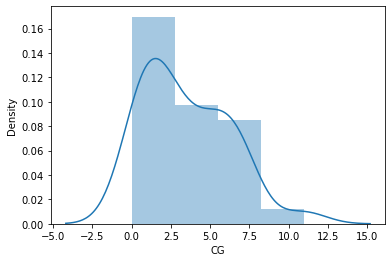

In [44]:
sns.distplot(ball['CG'])

<AxesSubplot:xlabel='SHO', ylabel='Density'>

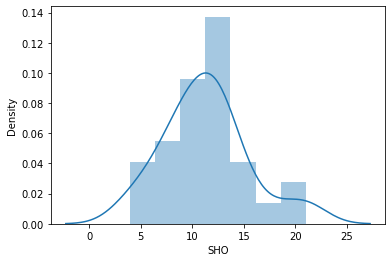

In [46]:
sns.distplot(ball['SHO'])

<AxesSubplot:xlabel='SV', ylabel='Density'>

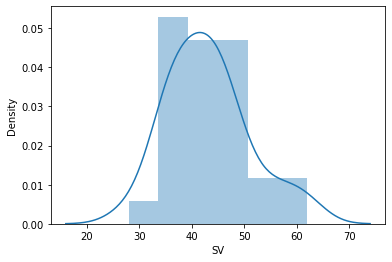

In [47]:
sns.distplot(ball['SV'])

<AxesSubplot:xlabel='E', ylabel='Density'>

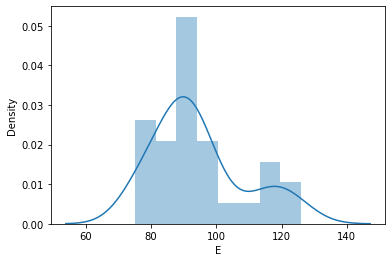

In [48]:
sns.distplot(ball['E'])

In [49]:
# Removing Outliers

from scipy.stats import zscore
z = np.abs(zscore(ball))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [50]:
threshold = 3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [51]:
ball_new = ball[(z<3).all(axis = 1)]
print(ball.shape)
print(ball_new.shape)

(30, 17)
(29, 17)


# Divide data in feature and Vector

In [52]:
x = ball_new.drop(['W'], axis = 1)
y = ball_new['W']

# Remove Skewness

In [53]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method='yeo-johnson')
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

In [54]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x =sc.fit_transform(x)
x

array([[ 9.62543504e-01,  0.00000000e+00,  0.00000000e+00,
         1.68518793e+00,  1.00615029e+00, -7.41927000e-01,
        -1.60519802e+00, -2.55061247e+00,  9.36131648e-01,
        -6.60978697e-01, -5.08052224e-01, -5.09292146e-01,
        -3.07098204e-01, -7.87002186e-01,  1.53275292e+00,
        -3.48265262e-01],
       [ 2.98863300e-01,  0.00000000e+00,  0.00000000e+00,
         1.38197902e-01,  1.18522654e+00, -1.09958425e-01,
        -4.62095966e-01,  9.36832915e-02, -5.16377335e-01,
         1.60225829e-01,  2.35800488e-01,  2.41440214e-01,
        -3.07098204e-01,  2.36736538e-01,  3.12020186e-01,
        -5.40819806e-01],
       [-3.12105130e-01,  0.00000000e+00,  0.00000000e+00,
         1.90738550e+00, -2.28819392e-01, -6.64354121e-01,
         1.23209786e+00, -9.35611465e-01,  2.25038365e-01,
        -6.74967476e-01, -7.52213881e-01, -6.42097599e-01,
         2.01131531e+00, -2.52844176e-01, -6.64136739e-01,
        -1.32612477e+00],
       [-1.30829774e+00,  0.00000000e

# Model

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [56]:
max_scr=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

In [57]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=155,test_size=0.20)

In [58]:
lr.fit(x_train, y_train)

LinearRegression()

In [59]:
lr.score(x_train, y_train)

0.942002256684977

In [60]:
# predict the value

pred = lr.predict(x_test)
print("Predicted result price: ", pred)
print("actual price ", y_test)

Predicted result price:  [95.41267179 64.80643246 66.0945105  57.26492213 77.30578818 89.41555988]
actual price  15    100
22     71
29     68
24     63
3      76
25     92
Name: W, dtype: int64


In [61]:
print('error:')

print('Mean absolute error: ', mean_absolute_error(y_test, pred))
print('Mean squared error: ', mean_squared_error(y_test, pred))

print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, pred)))

print(r2_score(y_test, pred))

error:
Mean absolute error:  3.7186152349566535
Mean squared error:  17.385046801974436
Root Mean Squared Error:  4.169537960251044
0.9013458882611791


# Regularization

# Lasso

In [65]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 66.267383585603
R2_score is :- 58.060612469013115


At cv:- 3
Cross validation score is:- 54.51262738526744
R2_score is :- 58.060612469013115


At cv:- 4
Cross validation score is:- 61.29940772479176
R2_score is :- 58.060612469013115


At cv:- 5
Cross validation score is:- 47.37613491918032
R2_score is :- 58.060612469013115


At cv:- 6
Cross validation score is:- 48.022584714015814
R2_score is :- 58.060612469013115


At cv:- 7
Cross validation score is:- 36.183916732549314
R2_score is :- 58.060612469013115


At cv:- 8
Cross validation score is:- 51.99178380056446
R2_score is :- 58.060612469013115


At cv:- 9
Cross validation score is:- -455.98490015519195
R2_score is :- 58.060612469013115




In [66]:
print("At cv:-",3)
print("Cross validation score is:-", 54.51262738526744 )
print("R2_score is :-", 58.060612469013115)

At cv:- 3
Cross validation score is:- 54.51262738526744
R2_score is :- 58.060612469013115


In [67]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 4.3086821585890105
Mean Squared Error: 26.421814144521736
Root Mean Square Error: 5.14021537919587


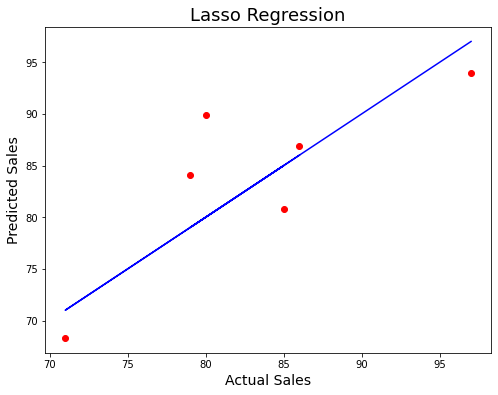

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# Model Saving

In [69]:
import pickle
filename = 'Baseball.pkl'
pickle.dump(ls, open(filename, 'wb'))

In [71]:
a = np.array(y_test)
predicted = np.array(lr.predict(x_test))
baseball = pd.DataFrame({"original": a, "predicted": predicted}, index = range(len(a)))
baseball

,original,predicted
0,100,95.412672
1,71,64.806432
2,68,66.094511
3,63,57.264922
4,76,77.305788
5,92,89.415560
